In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import datetime
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
#importing data
df = pd.read_csv('data/cal.csv')
df.head()

,Date,Share Code,High,Low,Previous,Open,Close,Total Shares Traded,Last
0,1/3/2017,CAL,0.76,0.76,0.75,0.75,0.76,10500,0.76
1,1/4/2017,CAL,0.78,0.76,0.76,0.76,0.78,17300,0.78
2,1/5/2017,CAL,0.78,0.76,0.78,0.78,0.78,4500,0.78
3,1/6/2017,CAL,0.78,0.76,0.78,0.78,0.77,133700,0.76
4,1/9/2017,CAL,0.78,0.76,0.77,0.77,0.76,16200,0.76


In [4]:
#training and test data
train = df[:612]
test = df[612:]

In [5]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%Y')
df.index = df['Date']



In [6]:
print(train.shape, test.shape)

(612, 9) (153, 9)


In [7]:
ts = pd.read_csv("data/cal.csv")

In [8]:
tss = pd.read_csv("data/cal.csv")
tss["Date"] = pd.to_datetime(tss["Date"])
tss.index = tss["Date"]
tss = tss[["Close"]]
print(tss.shape)
tss.head()

(765, 1)


,Close
Date,
2017-01-03,0.76
2017-01-04,0.78
2017-01-05,0.78
2017-01-06,0.77
2017-01-09,0.76


In [9]:
train = tss[:612]
test = tss[612:]
print(train.shape, test.shape)

(612, 1) (153, 1)


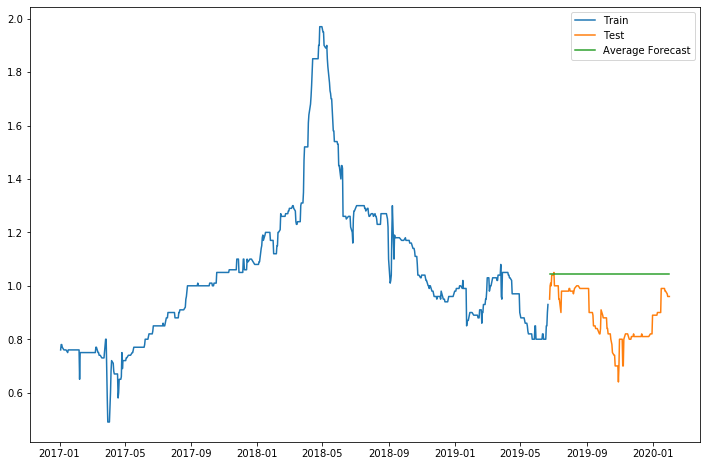

In [10]:
#simple Average
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Close'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()


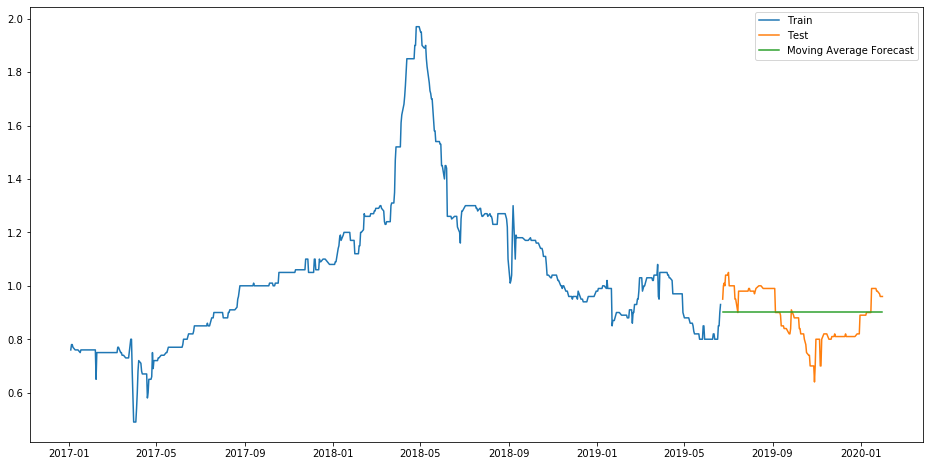

In [11]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Close'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [12]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.moving_avg_forecast))
print(rms)

0.09392436580767931


## Simple Exponential Smoothing

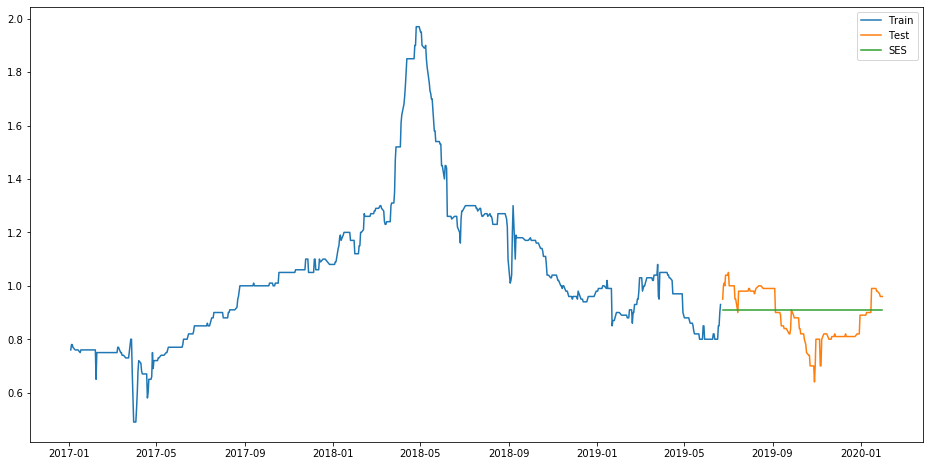

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [14]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.SES))
print(rms)

0.09480718165751624


## Holt-Linear Method

C:\Users\CodeBug\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


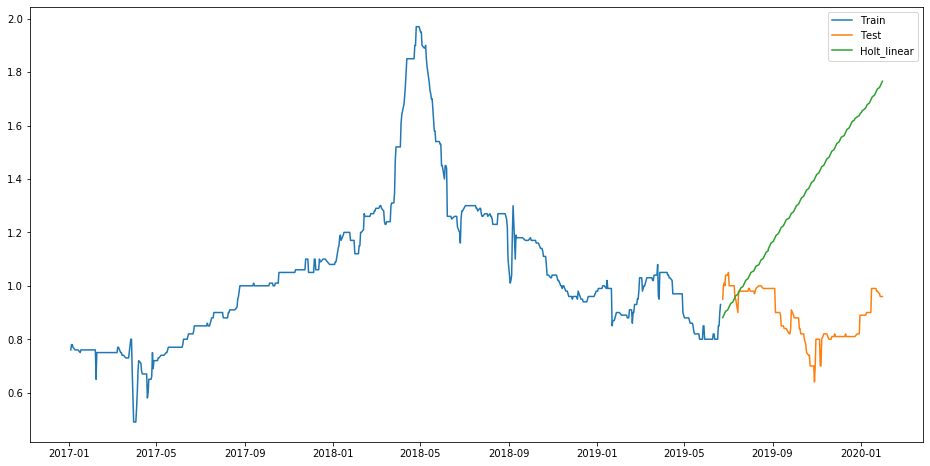

In [15]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Close'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [16]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_linear))
print(rms)

0.5345081960528707


## Holt-Winters

C:\Users\CodeBug\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\CodeBug\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


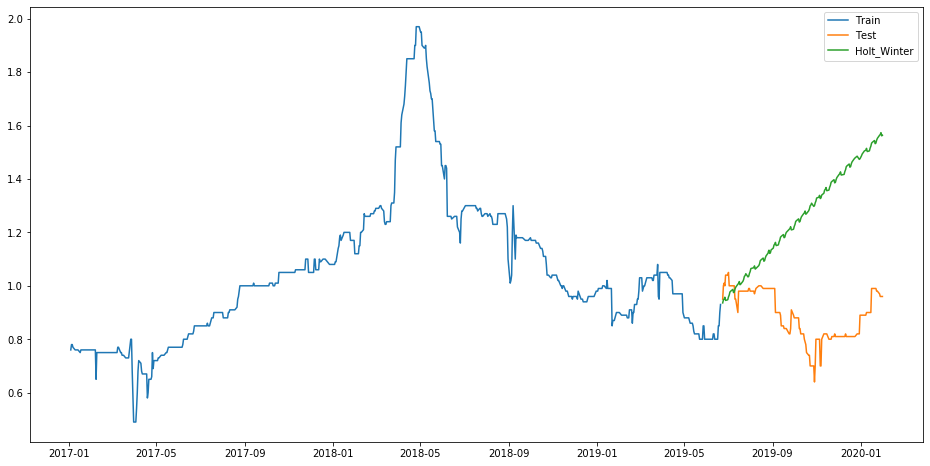

In [17]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Close']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [18]:
rms = sqrt(mean_squared_error(test.Close, y_hat_avg.Holt_Winter))
print(rms)

0.43877834332180254


In [27]:
decompose = ts[["Date", "Close"]]
decompose.index = ts["Date"]
decompose = decompose[["Close"]]
decompose.head()

,Close
Date,
1/3/2017,0.76
1/4/2017,0.78
1/5/2017,0.78
1/6/2017,0.77
1/9/2017,0.76


In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose
#decomposition = seasonal_decompose(decompose)

